## **Contoso Banking Scenario**
A Contoso bank  is on a digital transformation for all its departments. Bank has a growing customer base where majority of them are liability customers vs asset customers. Liability Customer - the one who deposits into the bank (depositors). Asset Customer - the one who borrows from the bank (borrowers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

### **Before we start**

We need the latest version of the azure-ai-ml package to run the code in this notebook. Run the cell below to verify that it is installed.

Note: If the azure-ai-ml package is not installed, run **pip install azure-ai-ml** to install it

In [1]:
pip show azure-ai-ml

Name: azure-ai-ml
Version: 1.21.0
Summary: Microsoft Azure Machine Learning Client Library for Python
Home-page: https://github.com/Azure/azure-sdk-for-python
Author: Microsoft Corporation
Author-email: azuresdkengsysadmins@microsoft.com
License: MIT License
Location: /anaconda/envs/azureml_py38/lib/python3.10/site-packages
Requires: azure-common, azure-core, azure-mgmt-core, azure-storage-blob, azure-storage-file-datalake, azure-storage-file-share, colorama, isodate, jsonschema, marshmallow, msrest, opencensus-ext-azure, opencensus-ext-logging, pydash, pyjwt, pyyaml, strictyaml, tqdm, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


### **Connect to the workspace**

With the required SDK packages installed, now we're ready to connect to  workspace.

To connect to a workspace, we need identifier parameters - a subscription ID, resource group name, and workspace name. Since we're working with a compute instance, managed by Azure Machine Learning, we can use the default values to connect to the workspace.

In [2]:
from azure.identity import DefaultAzureCredential, InteractiveBrowserCredential
from azure.ai.ml import MLClient

try:
    credential = DefaultAzureCredential()
    # Check if given credential can get token successfully.
    credential.get_token("https://management.azure.com/.default")
except Exception as ex:
    # Fall back to InteractiveBrowserCredential in case DefaultAzureCredential not work
    credential = InteractiveBrowserCredential()

In [3]:
# Get a handle to workspace
ml_client = MLClient.from_config(credential=credential)

Found the config file in: /config.json


In [4]:
import azureml.core
from azureml.core import Workspace

# Load the workspace from the saved config file
ws = Workspace.from_config()
print('Ready to use Azure ML {} to work with {}'.format(azureml.core.VERSION, ws.name))
print(ws.name)

Ready to use Azure ML 1.57.0 to work with mlw-cb-lfa9645f6e14945dc86
mlw-cb-lfa9645f6e14945dc86


### **List the datastores**
When we create the Azure Machine Learning workspace, an Azure Storage Account is created too. The Storage Account includes Blob and file storage and are automatically connected with  workspace as datastores. we can list all datastores connected to  workspace now:

In [5]:
stores = ml_client.datastores.list()
for ds_name in stores:
    print(ds_name.name)

workspaceworkingdirectory
workspacefilestore
workspaceblobstore
workspaceartifactstore


### **Import Dataset1 and Dataset 2 .Clean,merge and save to CSV file**

In [6]:
# Import necessary libraries
from azureml.core import Workspace, Dataset
import pandas as pd

# Step 1: Load the workspace
ws = Workspace.from_config()  # Ensure config.json is in the current directory

# Step 2: Get the datasets by name
part1 = Dataset.get_by_name(workspace=ws, name='Dataset1')
part2 = Dataset.get_by_name(workspace=ws, name='Dataset2')

# Step 3: Convert the datasets to pandas dataframes
df_part1 = part1.to_pandas_dataframe()
df_part2 = part2.to_pandas_dataframe()

# Step 4: Remove duplicates from both datasets
df_part1_nodups = df_part1.drop_duplicates()
df_part2_nodups = df_part2.drop_duplicates()

# Step 5: Merge the two datasets on a common column ('ID')
merged_data = pd.merge(left=df_part1_nodups, right=df_part2_nodups, on='ID')

# Step 6: Save the merged dataframe to a CSV file (if needed)
merged_data.to_csv('merged_data.csv', index=False)

print("Datasets have been successfully cleaned, merged, and saved as 'merged_data.csv'.")

{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe'}
{'infer_column_types': 'False', 'activity': 'to_pandas_dataframe', 'activityApp': 'TabularDataset'}
Datasets have been successfully cleaned, merged, and saved as 'merged_data.csv'.


In [7]:
#preview original dataset1.
merged_data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [8]:
df_part1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [9]:
df_part2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [10]:
#Preview your Data
merged_data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [11]:
#Describe the data after transposing. 
merged_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [12]:
# every column's missing value is replaced with 0 respectively . In this case LoanOnCard which is our target/outcome variable
merged_data = merged_data.dropna(axis=0)
merged_data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [13]:
#Check for non numeric value in the dataframe, again.
merged_data.isna().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [14]:
# The Customer ID attribute 'ID' does not influence the conversion to potential customers for loanoncard 
# so dropping the 'ID' attribute
# Assuming that the 'Zipcode' (in other words 'area') of the customers does not influence the 
# conversion to potential customers for loanoncard. So dropping the 'Zipcode' attribute
merged_data = merged_data.drop('ID', axis =1 ) 
merged_data = merged_data.drop('ZipCode', axis =1 )

In [15]:
#Display the data now. 
merged_data

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0.0


In [16]:
 #Show unique values in the LoadOnCard Column. 
merged_data.LoanOnCard.unique()

array([1., 0.])

<AxesSubplot: >

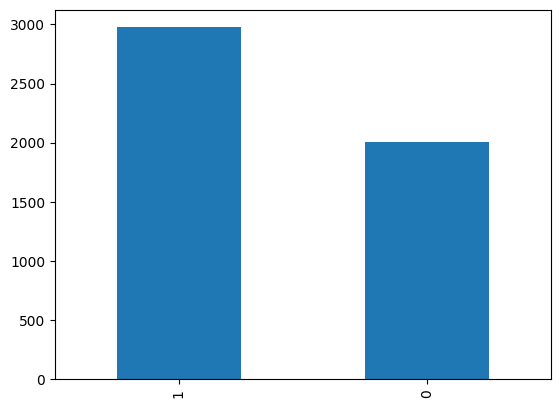

In [17]:
#Show the distribution of data in InternetBanking Column
merged_data['InternetBanking'].value_counts().plot(kind='bar')

<AxesSubplot: >

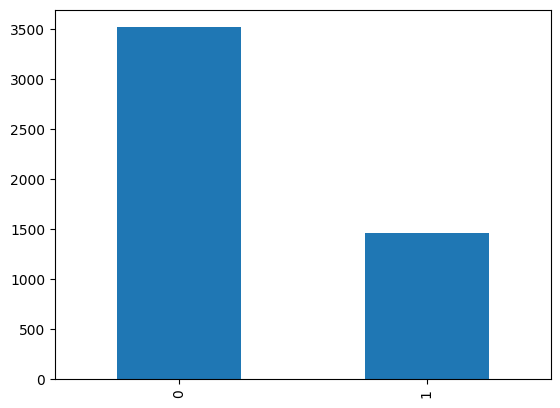

In [18]:
#Show the distribution of data in CreditCard Column
merged_data['CreditCard'].value_counts().plot(kind='bar')

<AxesSubplot: >

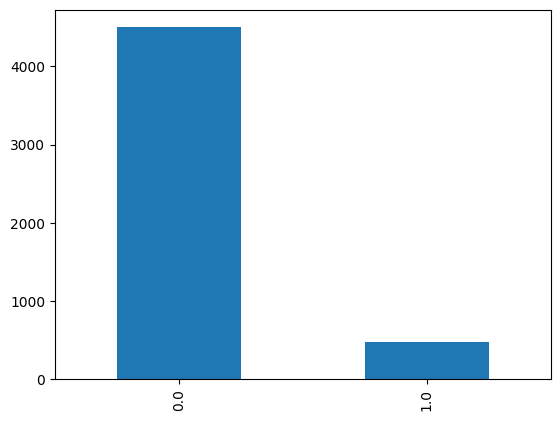

In [19]:
#Show the distribution of data in LoanOnCard Column. 
merged_data['LoanOnCard'].value_counts().plot(kind='bar')

<AxesSubplot: >

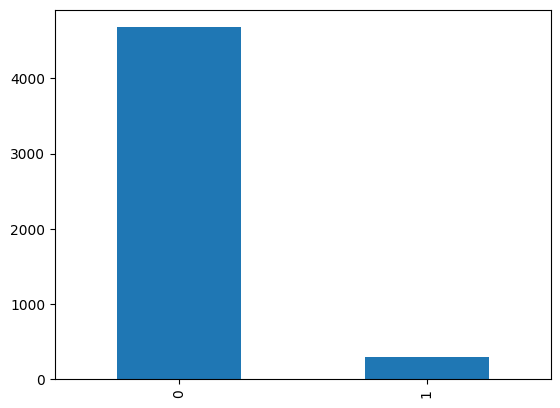

In [20]:
#Show the distribution of data in FixedDepositAccount Column
merged_data['FixedDepositAccount'].value_counts().plot(kind='bar')

<AxesSubplot: >

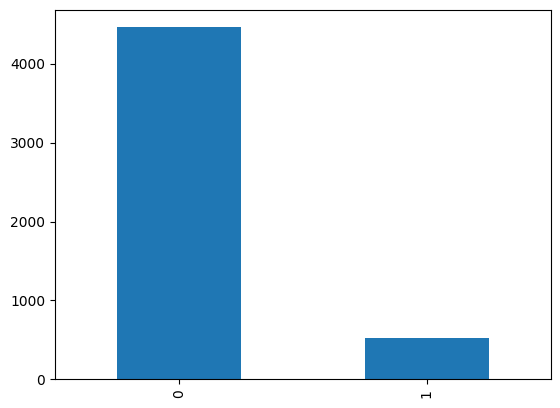

In [21]:
#Show the distribution of data in Security Column
merged_data['Security'].value_counts().plot(kind='bar')

In [22]:
# every column's missing value is replaced with 0 respectively . In this case LoanOnCard which is our target/outcome variable
merged_data = merged_data.dropna(axis=0)
merged_data

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0.0


In [24]:
#Check for non numeric value in the dataframe, again.
merged_data.isna().sum()

Age                    0
CustomerSince          0
HighestSpend           0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

## **Data Exploration, Analysis and Visualisation**
Univariate Analysis. Explore different analysis per learn path. We have covered only one to show.

We are not exploring all due to time constraint.Please try on your own and explore

/tmp/ipykernel_19659/3716600096.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = merged_data, x= 'FixedDepositAccount', palette = "YlOrBr")
/tmp/ipykernel_19659/3716600096.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = merged_data, x= 'CreditCard', palette = "crest")
/tmp/ipykernel_19659/3716600096.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = merged_data, x= 'Security',palette = "rocket_r")
/tmp/ipykernel_19659/3716600096.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is depreca

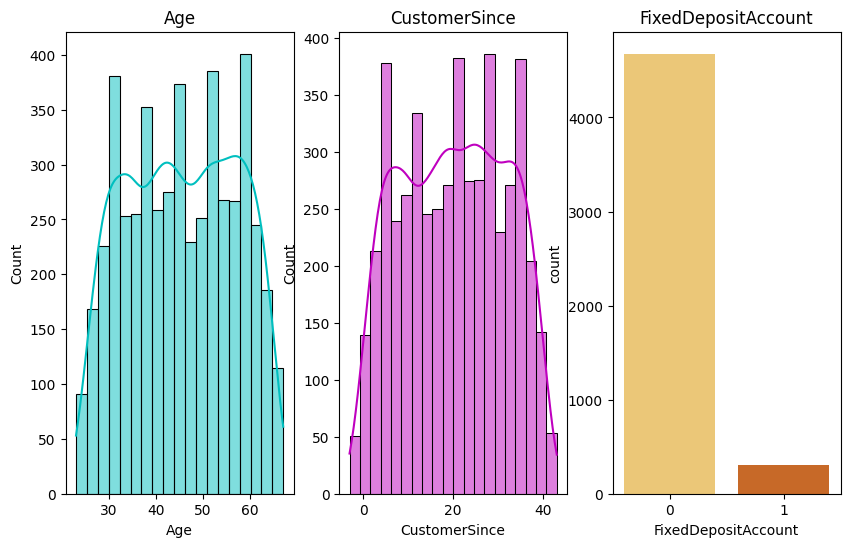

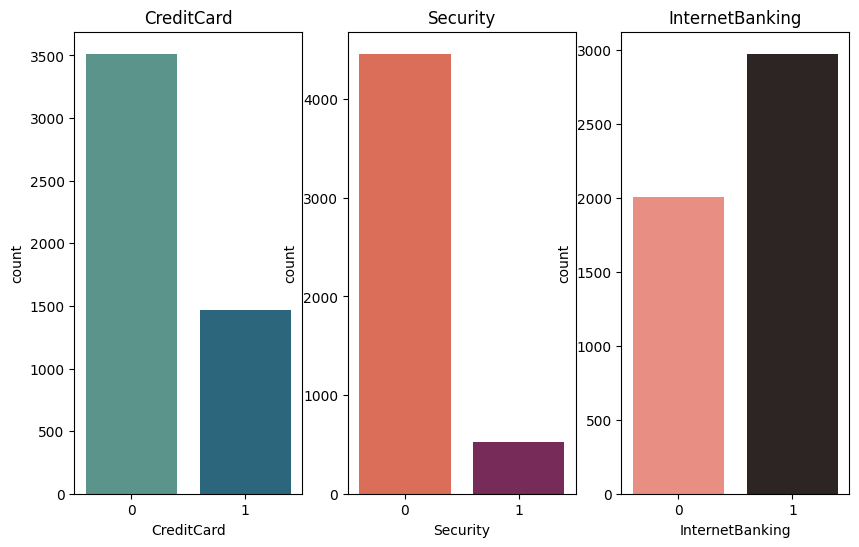

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.subplot(1, 3, 1)
plt.title('Age')
sns.histplot(merged_data['Age'],color='c', kde=True)


plt.subplot(1, 3, 2)
plt.title('CustomerSince')
sns.histplot(merged_data['CustomerSince'],color='m',kde=True)


plt.subplot(1, 3, 3)
plt.title('FixedDepositAccount')
sns.countplot(data = merged_data, x= 'FixedDepositAccount', palette = "YlOrBr")

plt.figure(figsize=(10,6))
plt.subplot(1, 3, 1)
plt.title('CreditCard')
sns.countplot(data = merged_data, x= 'CreditCard', palette = "crest")


plt.subplot(1, 3, 2)
plt.title('Security')
sns.countplot(data = merged_data, x= 'Security',palette = "rocket_r")


plt.subplot(1, 3, 3)
plt.title('InternetBanking')
sns.countplot(data = merged_data, x= 'InternetBanking',palette = "dark:salmon_r")


plt.show()

## **Data Preprocessing For Modelling**
**Treating Imbalanced Data**

In [26]:
# Import necessary libraries
from azureml.core import Workspace, Dataset
import pandas as pd
from sklearn.utils import resample



# Step 3: Separate majority and minority classes based on the 'LoanOnCard' column
df_loan = merged_data[merged_data['LoanOnCard'] == 1]  # Minority class
df_noloan = merged_data[merged_data['LoanOnCard'] == 0]  # Majority class

# Step 4: Upsample the minority class (LoanOnCard == 1)
df_loan_upsampled = resample(df_loan, replace=True, n_samples=4500, random_state=11)

# Step 5: Combine the majority class (LoanOnCard == 0) with the upsampled minority class
df_upsampled = pd.concat([df_noloan, df_loan_upsampled])

# Step 6: Display new class counts
class_counts = df_upsampled['LoanOnCard'].value_counts()
print("New class distribution after upsampling:")
print(class_counts)

# Step 7: Save the upsampled dataset to a CSV file
df_upsampled.to_csv('upsampled_data.csv', index=False)
print("Upsampled dataset saved as 'upsampled_data.csv'.")

New class distribution after upsampling:
0.0    4500
1.0    4500
Name: LoanOnCard, dtype: int64
Upsampled dataset saved as 'upsampled_data.csv'.


In [27]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9000 entries, 10 to 2707
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  9000 non-null   int64  
 1   CustomerSince        9000 non-null   int64  
 2   HighestSpend         9000 non-null   int64  
 3   HiddenScore          9000 non-null   int64  
 4   MonthlyAverageSpend  9000 non-null   float64
 5   Level                9000 non-null   int64  
 6   Mortgage             9000 non-null   int64  
 7   Security             9000 non-null   int64  
 8   FixedDepositAccount  9000 non-null   int64  
 9   InternetBanking      9000 non-null   int64  
 10  CreditCard           9000 non-null   int64  
 11  LoanOnCard           9000 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 914.1 KB


In [28]:
# Import necessary libraries
from azureml.core import Workspace, Dataset
import pandas as pd
from sklearn.utils import resample

# Step 4: Upsample the minority class (LoanOnCard == 1) with 70% of the majority class size (e.g., 3500 samples)
df_loan_upsampled_70 = resample(df_loan, replace=True, n_samples=3500, random_state=13)

# Step 5: Combine the majority class (LoanOnCard == 0) with the upsampled minority class
df_upsampled_70 = pd.concat([df_noloan, df_loan_upsampled_70])

# Step 6: Display new class counts after upsampling
class_counts_70 = df_upsampled_70['LoanOnCard'].value_counts()
print("New class distribution after 70% upsampling:")
print(class_counts_70)

# Step 7: Save the 70% upsampled dataset to a CSV file
df_upsampled_70.to_csv('upsampled_data_70.csv', index=False)
print("70% upsampled dataset saved as 'upsampled_data_70.csv'.")

New class distribution after 70% upsampling:
0.0    4500
1.0    3500
Name: LoanOnCard, dtype: int64
70% upsampled dataset saved as 'upsampled_data_70.csv'.


In [29]:
df_upsampled_70.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 10 to 3006
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  8000 non-null   int64  
 1   CustomerSince        8000 non-null   int64  
 2   HighestSpend         8000 non-null   int64  
 3   HiddenScore          8000 non-null   int64  
 4   MonthlyAverageSpend  8000 non-null   float64
 5   Level                8000 non-null   int64  
 6   Mortgage             8000 non-null   int64  
 7   Security             8000 non-null   int64  
 8   FixedDepositAccount  8000 non-null   int64  
 9   InternetBanking      8000 non-null   int64  
 10  CreditCard           8000 non-null   int64  
 11  LoanOnCard           8000 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 812.5 KB


# Model Preparation
### Split Data set into Train and Test data

In [30]:
# Step 1: Split the dataset into features (X) and target (y)
X = merged_data.drop(['LoanOnCard'], axis=1)  # Drop the target column to get the features
y = merged_data['LoanOnCard']  # Target column (label)

In [31]:
X_full = df_upsampled.drop(['LoanOnCard'],axis=1)
y_full = df_upsampled.LoanOnCard
X_70 = df_upsampled_70.drop(['LoanOnCard'],axis=1)
y_70 = df_upsampled_70.LoanOnCard

In [32]:
# Import necessary libraries
from azureml.core import Workspace, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 4: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Step 5: Print the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (3984, 11)
X_test shape: (996, 11)
y_train shape: (3984,)
y_test shape: (996,)


In [34]:
# Split train and test data (target fully sampled) at 80:20 ratio
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.20, random_state=1)
print(X_full_train.shape)
print(X_full_test.shape)
print(y_full_train.shape)
print(y_full_test.shape)

(7200, 11)
(1800, 11)
(7200,)
(1800,)


In [35]:
# Split train and test data at 80:20 ratio
X_70_train, X_70_test, y_70_train, y_70_test = train_test_split(X_70, y_70, test_size=0.20, random_state=1)
print(X_70_train.shape)
print(X_70_test.shape)
print(y_70_train.shape)
print(y_70_test.shape)

(6400, 11)
(1600, 11)
(6400,)
(1600,)


### Modelling Inferences
After comparing various modelling techniques and with different kinds of tuning models and target data set, it is found that the Logistic Regression model with liblinear solver and with over-sampling of target minority class equal to that of the target majority class is the best model with better Recall, precision, f1-score and Accuracy score.We have not shown you all the techniques, you try and explore on your own as a home work

Model Accuracy - 89%

Class Precision - 90% (class 0), 88% (class 1)

Class recall - 90% (class 0), 87% (class 1)

Class f1-score - 90% (class 0), 87% (class 1)

Based on our conclusion we are going to use the df_upsampled data. the reference to which can be found in the Treating the imbalanced data section above.

### Apply Logistic Regression
Configure automated machine learning job
Now, we're ready to configure the automated machine learning experiment.

When we run the code below, it will create an automated machine learning job that:

Uses the compute cluster named 
Sets loan as the target column
Sets accuracy as the primary metric
Times out after 60 minutes of total training time
Trains a maximum of 5 models
No model will be trained with the LogisticRegression algorithm

In [36]:
local_path = 'Data/finance.csv'
df_upsampled.to_csv(local_path)



# get the datastore to upload prepared data
datastore = ws.get_default_datastore()

# upload the local file from src_dir to the target_path in datastore
datastore.upload(src_dir='Data', target_path='Data')

#create a dataset referencing the cloud location
ds = Dataset.Tabular.from_delimited_files(datastore.path('Data/finance.csv'))

financial = ds.register(workspace=ws, name='finance1_ds', description='finance training data')

"Datastore.upload" is deprecated after version 1.0.69. Please use "Dataset.File.upload_directory" to upload your files             from a local directory and create FileDataset in single method call. See Dataset API change notice at https://aka.ms/dataset-deprecation.


Uploading an estimated of 3 files
Uploading Data/Dataset1.csv
Uploaded Data/Dataset1.csv, 1 files out of an estimated total of 3
Uploading Data/Dataset2.csv
Uploaded Data/Dataset2.csv, 2 files out of an estimated total of 3
Uploading Data/finance.csv
Uploaded Data/finance.csv, 3 files out of an estimated total of 3
Uploaded 3 files


## **We will now be deploying the model**
### **Define an environment**
When we run a Python script as an experiment in Azure Machine Learning, a Conda environment is created to define the execution context for the script. Azure Machine Learning provides a default environment that includes many common packages; including the azureml-defaults package that contains the libraries necessary for working with an experiment run, as well as popular packages like pandas and numpy.

You can also define your own environment and add packages by using conda or pip, to ensure your experiment has access to all the libraries it requires.

In [37]:
from azureml.core import Environment
from azureml.core.conda_dependencies import CondaDependencies

# Create a Python environment for the experiment
financial_env = Environment("financial-experiment-env")
financial_env.python.user_managed_dependencies = False # Let Azure ML manage dependencies
#financial_env.docker.enabled = True # Use a docker container

# Create a set of package dependencies (conda or pip as required)
financial_packages = CondaDependencies.create(conda_packages=['scikit-learn','ipykernel','matplotlib','pandas','pip'],
                                             pip_packages=['azureml-sdk','pyarrow', 'azureml-defaults'])

# Add the dependencies to the environment
financial_env.python.conda_dependencies = financial_packages

print(financial_env.name, 'environment defined and registered.')

#  Register the environment to the workspace (optional)
financial_env.register(workspace=ws)

financial-experiment-env environment defined and registered.


{
    "assetId": "azureml://locations/eastus/workspaces/81895327-f280-4a43-917b-ccb57c6d885b/environments/financial-experiment-env/versions/1",
    "databricks": {
        "eggLibraries": [],
        "jarLibraries": [],
        "mavenLibraries": [],
        "pypiLibraries": [],
        "rcranLibraries": []
    },
    "docker": {
        "arguments": [],
        "baseDockerfile": null,
        "baseImage": "mcr.microsoft.com/azureml/openmpi4.1.0-ubuntu20.04:20240709.v1",
        "baseImageRegistry": {
            "address": null,
            "password": null,
            "registryIdentity": null,
            "username": null
        },
        "buildContext": null,
        "enabled": false,
        "platform": {
            "architecture": "amd64",
            "os": "Linux"
        },
        "sharedVolumes": true,
        "shmSize": null
    },
    "environmentVariables": {
        "EXAMPLE_ENV_VAR": "EXAMPLE_VALUE"
    },
    "inferencingStackVersion": null,
    "name": "financial-exp

### View registered environments
In addition to registering your own environments, you can leverage pre-built "curated" environments for common experiment types. The following code lists all registered environments:

In [38]:
from azureml.core import Environment

envs = Environment.list(workspace=ws)
for env in envs:
    print("Name",env)

Name financial-experiment-env
Name AzureML-ACPT-pytorch-1.13-py38-cuda11.7-gpu


In [39]:
import os

# Create a folder for the experiment files
experiment_folder = 'finance_training_folder'
os.makedirs(experiment_folder, exist_ok=True)
print(experiment_folder, 'folder created')

finance_training_folder folder created


### Prepare the training script

In [43]:
%%writefile $experiment_folder/finance_training.py
# Import libraries
import argparse
from azureml.core import Run
from azureml.core import Model
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get script arguments
parser = argparse.ArgumentParser()
parser.add_argument("--input-data", type=str, dest='training_dataset_id')
args = parser.parse_args()

# Get the experiment run context
run = Run.get_context()

# load the finance data (passed as an input dataset)
print("Loading Data...")
finance = run.input_datasets['training_data'].to_pandas_dataframe()

# Separate features and labels
X, y = finance[['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore', 'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard']].values, finance['LoanOnCard'].values

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Train a logistic regression model
print('Training a logistic regression model')
model = LogisticRegression(solver = 'liblinear', multi_class= 'auto', max_iter=200).fit(X_train, y_train)

# calculate accuracy
y_hat = model.predict(X_test)
acc = np.average(y_hat == y_test)
print('Accuracy:', acc)
run.log('Accuracy', np.float(acc))

# calculate AUC
y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))
run.log('AUC', np.float(auc))

os.makedirs('outputs', exist_ok=True)
# note file saved in the outputs folder is automatically uploaded into experiment record
joblib.dump(value=model, filename='outputs/finance_model.pkl')

run.complete()

Overwriting finance_training_folder/finance_training.py


### **Run an experiment on remote compute**
Now we're ready to re-run the experiment  ran previously, but this time on the compute cluster .

**Note**: The experiment will take 15-20 min because a container image must be built with the conda environment, and then the cluster nodes must be started and the image deployed before the script can be run. For a simple experiment like the finance training script, this may seem inefficient; but imagine you needed to run a more complex experiment that takes several hours - dynamically creating more scalable compute may reduce the overall time significantly.

In [41]:
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException

#replace this with your cluster name
cluster_name = "cb-aml-cluster"

try:
    # Check for existing compute target
    training_cluster = ComputeTarget(workspace=ws, name=cluster_name)
    print('Found existing cluster, use it.')
except ComputeTargetException:
    # If it doesn't already exist, create it
    try:
        compute_config = AmlCompute.provisioning_configuration(vm_size='STANDARD_DS3_V2', max_nodes=4)
        training_cluster = ComputeTarget.create(ws, cluster_name, compute_config)
        training_cluster.wait_for_completion(show_output=True)
    except Exception as ex:
        print(ex)

Found existing cluster, use it.


In [47]:
# Import required libraries
from azureml.core import Workspace, Experiment, ScriptRunConfig, Environment, Dataset


# Step 1: Connect to the Azure ML workspace
ws = Workspace.from_config()

# Step 2: Get the training dataset
financial_ds = Dataset.get_by_name(ws, name="finance1_ds")  # Replace with your dataset name if needed

# Step 3: Retrieve the registered environment
registered_env = Environment.get(workspace=ws, name='financial-experiment-env')

# Step 4: Create the ScriptRunConfig
# Specify the folder where your Python training script is located
experiment_folder = './finance_training_folder'


# Set the compute target name
compute_target = "cb-aml-cluster"  # Replace with your cluster name

# Define the configuration for running the script
script_config = ScriptRunConfig(
    source_directory=experiment_folder,
    script='finance_training.py',  # Name of your training script
    arguments=['--input-data', financial_ds.as_named_input('training_data')],  # Pass dataset as named input
    environment=registered_env,  # Use the registered environment
    compute_target=compute_target  # Specify the compute target
)

# Step 5: Submit the experiment
experiment_name = 'cbml-train-finance'
experiment = Experiment(workspace=ws, name=experiment_name)

# Submit the experiment and get the run object
run = experiment.submit(config=script_config)


# Step 6: Wait for the run to complete
run.wait_for_completion(show_output=True)


RunId: cbml-train-finance_1729197003_3f662956
Web View: https://ml.azure.com/runs/cbml-train-finance_1729197003_3f662956?wsid=/subscriptions/220eea30-38a6-41a3-ba2c-767d7667a03a/resourcegroups/rg-contosobank-lfa9645f6e14945dc86/workspaces/mlw-cb-lfa9645f6e14945dc86&tid=d83a6143-104d-46a7-987d-230c352019f1

Streaming azureml-logs/20_image_build_log.txt

======Starting Image Build on Serverless Compute======
The run ID for the image build on serverless compute is imgbldrun_2e4d7f8
Additional logs for the run: https://ml.azure.com/experiments/id/prepare_image/runs/imgbldrun_2e4d7f8?wsid=/subscriptions/220eea30-38a6-41a3-ba2c-767d7667a03a/resourcegroups/rg-contosobank-lfa9645f6e14945dc86/workspaces/mlw-cb-lfa9645f6e14945dc86&tid=d83a6143-104d-46a7-987d-230c352019f1
2024-10-17T20:33:59: Logging into Docker registry: 81895327f2804a43917bccb57c6d885b.azurecr.io
2024-10-17T20:33:59: WARNING! Using --password via the CLI is insecure. Use --password-stdin.
2024-10-17T20:33:59: WARNING! Your pass

{'runId': 'cbml-train-finance_1729197003_3f662956',
 'target': 'cb-aml-cluster',
 'status': 'Completed',
 'startTimeUtc': '2024-10-17T20:45:20.926762Z',
 'endTimeUtc': '2024-10-17T20:47:22.766938Z',
 'services': {},
 'properties': {'_azureml.ComputeTargetType': 'amlctrain',
  '_azureml.ClusterName': 'cb-aml-cluster',
  'ContentSnapshotId': '9da2e2f4-8df2-4877-92ac-d37481c3d583',
  'ProcessInfoFile': 'azureml-logs/process_info.json',
  'ProcessStatusFile': 'azureml-logs/process_status.json'},
 'inputDatasets': [{'dataset': {'id': '92d580a4-9e9a-48c1-84ca-b98af42b0c29'}, 'consumptionDetails': {'type': 'RunInput', 'inputName': 'training_data', 'mechanism': 'Direct'}}],
 'outputDatasets': [],
 'runDefinition': {'script': 'finance_training.py',
  'command': '',
  'useAbsolutePath': False,
  'arguments': ['--input-data', 'DatasetConsumptionConfig:training_data'],
  'sourceDirectoryDataStore': None,
  'framework': 'Python',
  'communicator': 'None',
  'target': 'cb-aml-cluster',
  'dataRefere

##### After the experiment has finished, you can get the metrics and files generated by the experiment run. This time, the files will include logs for building the image and managing the compute.

In [48]:
# Get logged metrics
metrics = run.get_metrics()
for key in metrics.keys():
        print(key, metrics.get(key))
print('\n')
for file in run.get_file_names():
    print(file)

AUC 0.9651003579228865
Accuracy 0.8933333333333333


azureml-logs/20_image_build_log.txt
logs/azureml/dataprep/0/rslex.log.2024-10-17-20
outputs/finance_model.pkl
system_logs/cs_capability/cs-capability.log
system_logs/hosttools_capability/hosttools-capability.log
system_logs/lifecycler/execution-wrapper.log
system_logs/lifecycler/lifecycler.log
system_logs/metrics_capability/metrics-capability.log
system_logs/snapshot_capability/snapshot-capability.log
user_logs/std_log.txt


##### **Now register the model that was trained by the experiment.**

In [49]:
from azureml.core import Model

# Register the model
run.register_model(model_path='outputs/finance_model.pkl', model_name='finance_model',
                   tags={'Training context':'Compute cluster'}, properties={'AUC': run.get_metrics()['AUC'], 'Accuracy': run.get_metrics()['Accuracy']})

# List registered models
for model in Model.list(ws):
    print(model.name, 'version:', model.version)
    for tag_name in model.tags:
        tag = model.tags[tag_name]
        print ('\t',tag_name, ':', tag)
    for prop_name in model.properties:
        prop = model.properties[prop_name]
        print ('\t',prop_name, ':', prop)
    print('\n')

finance_model version: 1
	 Training context : Compute cluster
	 AUC : 0.9651003579228865
	 Accuracy : 0.8933333333333333




## Deploy the model as a web service
We have trained and registered a machine learning model that classifies customers based on the likelihood of them taking loans. This model could be used in a production environment where the banks wants to find out who are their potential customers ready to take a loan. To support this scenario, we will deploy the model as a web service.

In [50]:
from azureml.core import Model
model = Model(ws, 'finance_model', version = 1)
print(model.name, 'version', model.version)

finance_model version 1


In [51]:
import os

folder_name = 'finance_service'

# Create a folder for the web service files
experiment_folder = './' + folder_name
os.makedirs(experiment_folder, exist_ok=True)

print(folder_name, 'folder created.')

# Set path for scoring script
script_file = os.path.join(experiment_folder,"score_finance.py")

finance_service folder created.


##### The web service where we deploy the model will need some Python code to load the input data, get the model from the workspace, and generate and return predictions. We'll save this code in an entry script (often called a scoring script) that will be deployed to the web service:

In [52]:
%%writefile $script_file
import json
import joblib
import numpy as np
from azureml.core.model import Model

# Called when the service is loaded
def init():
    global model
    # Get the path to the deployed model file and load it
    model_path = Model.get_model_path('finance_model')
    print(model_path)
    model = joblib.load(model_path)

# Called when a request is received
def run(raw_data):
    # Get the input data as a numpy array
    data = np.array(json.loads(raw_data)['data'])
    # Get a prediction from the model
    predictions = model.predict(data)
    return json.dumps({"result": predictions.tolist()})

Writing ./finance_service/score_finance.py


##### Deployment will take 2-3 minutes as it first runs a process to create a container image, and then runs a process to create a web service based on the image. When deployment has completed successfully, we'll see a status of Healthy.

In [57]:
from azureml.core.webservice import AciWebservice
from azureml.core.model import InferenceConfig

# Configure the scoring environment
inference_config = InferenceConfig(entry_script=script_file,
                                   environment=registered_env)

deployment_config = AciWebservice.deploy_configuration(cpu_cores = 1, memory_gb = 1)

service_name = "finance-service"

service = Model.deploy(ws, service_name, [model], inference_config, deployment_config)

service.wait_for_deployment(True)
print(service.state)

/tmp/ipykernel_19659/287259017.py:12: FutureWarning: azureml.core.model:
To leverage new model deployment capabilities, AzureML recommends using CLI/SDK v2 to deploy models as online endpoint, 
please refer to respective documentations 
https://docs.microsoft.com/azure/machine-learning/how-to-deploy-managed-online-endpoints /
https://docs.microsoft.com/azure/machine-learning/how-to-attach-kubernetes-anywhere 
For more information on migration, see https://aka.ms/acimoemigration 
To disable CLI/SDK v1 deprecation warning set AZUREML_LOG_DEPRECATION_WARNING_ENABLED to 'False'
  service = Model.deploy(ws, service_name, [model], inference_config, deployment_config)


Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2024-10-17 20:55:00+00:00 Creating Container Registry if not exists.
2024-10-17 20:55:00+00:00 Use the existing image.
2024-10-17 20:55:00+00:00 Generating deployment configuration.
2024-10-17 20:55:03+00:00 Submitting deployment to compute.
2024-10-17 20:55:10+00:00 Checking the status of deployment finance-service..
2024-10-17 20:57:11+00:00 Checking the status of inference endpoint finance-service.
Succeeded
ACI service creation operation finished, operation "Succeeded"
Healthy


In [58]:
for webservice_name in ws.webservices:
    print(webservice_name)

finance-service


## Use the web service
##### With the service deployed, now you can consume it from a client application.

In [59]:
endpoint = service.scoring_uri
print(endpoint)

http://29bb7fe2-0b8b-44b7-b16d-5ee70d02d3c3.eastus.azurecontainer.io/score


In [60]:
import requests
import json

x_new = [[38,16,500,1,6.9,3,0,0,0,0,0],
         [22,1,100,2,1.2,1,0,0,0,0,0]]


# Convert the array to a serializable list in a JSON document
input_json = json.dumps({"data": x_new})

# Set the content type
headers = { 'Content-Type':'application/json' }

predictions = requests.post(endpoint, input_json, headers = headers)
predicted_classes = json.loads(predictions.json())

In [61]:
for i in range(len(x_new)):
    if predicted_classes['result'][i] == 1.0 : 
        customer_class = 'an Asset Customer'
    else :
        customer_class = 'a liability Customer'
    print ("Customer Type {}".format(x_new[i]), "has predicted score", predicted_classes['result'][i], "therefore it is", customer_class )

Customer Type [38, 16, 500, 1, 6.9, 3, 0, 0, 0, 0, 0] has predicted score 1.0 therefore it is an Asset Customer
Customer Type [22, 1, 100, 2, 1.2, 1, 0, 0, 0, 0, 0] has predicted score 0.0 therefore it is a liability Customer
